# Probability and joint-probability distributions

In [ ]:
# !uv pip install scipy  # IF SCIPY IS NOT YET INSTALLED

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import norm, multivariate_normal
import math

%matplotlib inline

SEED = 42
rng = np.random.default_rng(seed=SEED)

### Statistics recap

* [Random variable](http://en.wikipedia.org/wiki/Random_variable): a variable whose value is subject to variations due to __chance__. A random variable can take on a set of possible different values, each with an associated probability, in contrast to other mathematical variables.

* [Probability distribution](http://en.wikipedia.org/wiki/Probability_distribution): mathematical function describing the possible values of a random variable and their associated probabilities.

* [Probability density function (pdf)](http://en.wikipedia.org/wiki/Probability_density_function) of a __continuous random variable__ is a function that describes the relative likelihood for this random variable to take on a given value. 
     * The probability of the random variable falling within a particular range of values is given by the integral of this variable’s density over that range.
     * The probability density function is nonnegative everywhere, and its integral over the entire space is equal to one.
     
<img src='http://upload.wikimedia.org/wikipedia/commons/2/25/The_Normal_Distribution.svg' width='50%' align='center'/>
 

### [Moments](http://en.wikipedia.org/wiki/Moment_(mathematics))

The probability distribution of a random variable is often characterised by a small number of parameters, which also have a practical interpretation.

* [Mean](http://en.wikipedia.org/wiki/Mean) (a.k.a expected value) refers to one measure of the central tendency either of a probability distribution or of the random variable characterized by that distribution.
    * population mean: $\mu = \operatorname{E}[X]$.
    * estimation of sample mean: $\bar{x}$.
* [Standard deviation](http://en.wikipedia.org/wiki/Standard_deviation) measures the amount of variation or dispersion from the mean.
    * population deviation:
    $$
    \sigma = \sqrt{\operatorname E[X^2]-(\operatorname E[X])^2} = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}.
    $$
    * unbiased estimator:
    $$ 
        s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2.
    $$

### A tale of two samples

In [5]:
sample1 = rng.normal(0, 0.5, size=1000)
sample2 = rng.normal(1, 1, size=500)

In [11]:
def plot_normal_sample(sample, mu, sigma):
    "Plots an histogram and the normal distribution corresponding to the parameters."
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
    plt.plot(x, norm.pdf(x, mu, sigma), "b", lw=2)
    plt.hist(sample, 30, density=True, alpha=0.2)
    plt.annotate(
        "3$\sigma$",
        xy=(mu + 3 * sigma, 0),
        xycoords="data",
        xytext=(0, 100),
        textcoords="offset points",
        fontsize=15,
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="arc,angleA=180,armA=20,angleB=90,armB=15,rad=7",
        ),
    )
    plt.annotate(
        "-3$\sigma$",
        xy=(mu - 3 * sigma, 0),
        xycoords="data",
        xytext=(0, 100),
        textcoords="offset points",
        fontsize=15,
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="arc,angleA=180,armA=20,angleB=90,armB=15,rad=7",
        ),
    )

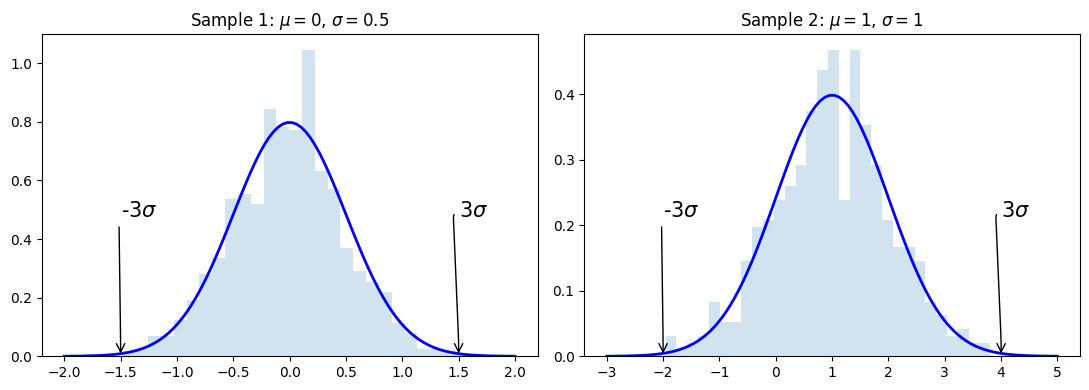

In [12]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_normal_sample(sample1, 0, 0.5)
plt.title("Sample 1: $\mu=0$, $\sigma=0.5$")
plt.subplot(122)
plot_normal_sample(sample2, 1, 1)
plt.title("Sample 2: $\mu=1$, $\sigma=1$")
plt.tight_layout();

In [13]:
print("Sample 1; estimated mean:", sample1.mean(), " and std. dev.: ", sample1.std())
print("Sample 2; estimated mean:", sample2.mean(), " and std. dev.: ", sample2.std())

Sample 1; estimated mean: -0.014445775497973419  and std. dev.:  0.494361177698254
Sample 2; estimated mean: 0.9960769747238042  and std. dev.:  1.0202828786159823


### [Joint probability distributions](https://en.wikipedia.org/wiki/Joint_probability_distribution)

Given random variables $X , Y , \ldots$, that are defined on a probability space, the joint probability distribution for $X , Y , \ldots$ is a probability distribution that gives the probability that each of $X , Y , \ldots$ falls in any particular range or discrete set of values specified for that variable.

[Covariance](http://en.wikipedia.org/wiki/Covariance) is a measure of how much two random variables change together, usually in the context of such joint probability distributions. 
$$
\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]},
$$
$$
\operatorname{cov}(X,X) = s(X),
$$

* The sign of the covariance therefore shows the tendency in the linear relationship between the variables. 
* The magnitude of the covariance is not easy to interpret. 
* The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.

### Understanding covariance

In [14]:
sample_2d = np.array(list(zip(sample1, np.ones(len(sample1))))).T

Text(0, 0.5, 'Y')

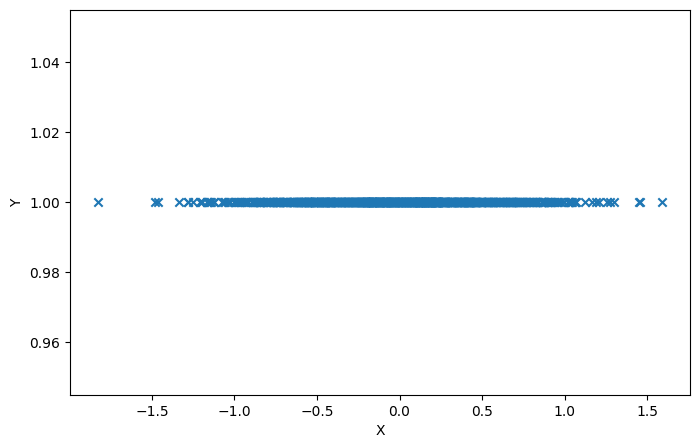

In [15]:
fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(111)
ax.scatter(sample_2d[0, :], sample_2d[1, :], marker="x")
ax.set_xlabel("X")
ax.set_ylabel("Y")

In [16]:
np.cov(sample_2d)  # computes covariance between the two components of the sample

array([[0.24463761, 0.        ],
       [0.        , 0.        ]])

As the sample is only distributed along one axis, the covariance does not detects any relationship between them.
What happens when we rotate the sample?

In [17]:
def rotate_sample(sample, angle=-45):
    "Rotates a sample by `angle` degrees."
    theta = np.deg2rad(angle)
    rot_matrix = np.array(
        [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
    )
    return sample.T.dot(rot_matrix).T

In [18]:
rot_sample_2d = rotate_sample(sample_2d)

Text(0, 0.5, 'Y')

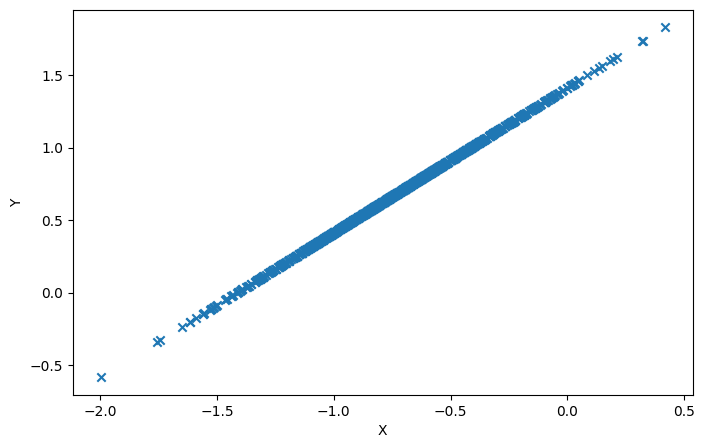

In [19]:
fig = plt.figure(2, figsize=(8, 5))
ax = fig.add_subplot(111)
ax.scatter(rot_sample_2d[0, :], rot_sample_2d[1, :], marker="x")
ax.set_xlabel("X")
ax.set_ylabel("Y")

In [20]:
np.cov(rot_sample_2d)

array([[0.12231881, 0.12231881],
       [0.12231881, 0.12231881]])

### A two-dimensional normally-distributed variable

Text(0, 0.5, 'Y')

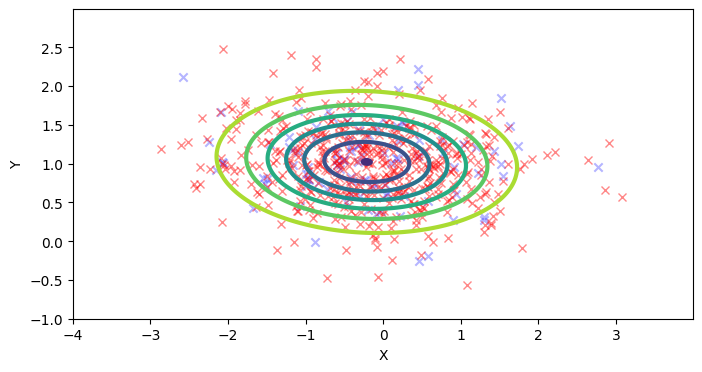

In [26]:
mu = [0, 1]
cov = [[1, 0], [0, 0.2]]  # diagonal covariance, points lie on x or y-axis
sample = rng.multivariate_normal(mu, cov, size=100).T
fig = plt.figure(3, figsize=(8, 5))
ax = fig.add_subplot(111)
ax.scatter(sample[0], sample[1], marker="x", color="b", alpha=0.29)

estimated_mean = sample.mean(axis=1)
estimated_cov = np.cov(sample)
e_x, e_y = rng.multivariate_normal(estimated_mean, estimated_cov, size=500).T

ax.plot(e_x, e_y, "rx", alpha=0.47)
x, y = np.mgrid[-4:4:0.01, -1:3:0.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv = multivariate_normal(estimated_mean, estimated_cov)
ax.contour(x, y, rv.pdf(pos), cmap=cm.viridis_r, linewidths=3)
ax.set_aspect("equal")
ax.set_xlabel("X")
ax.set_ylabel("Y")

(np.float64(-4.582604166666666),
 np.float64(4.572604166666666),
 np.float64(-1.2909375),
 np.float64(3.2809375000000003),
 np.float64(-0.02916666561082861),
 np.float64(0.4291666665949107))

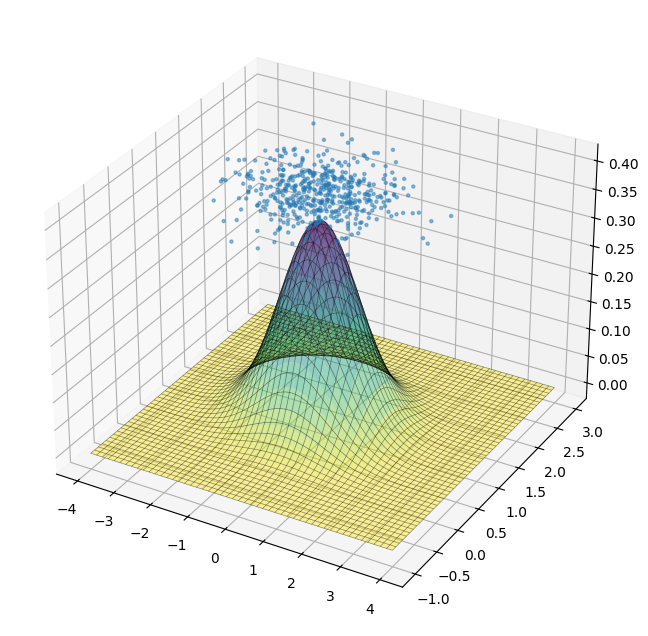

In [27]:
fig = plt.figure(4, figsize=(12, 8))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    x,
    y,
    rv.pdf(pos),
    cmap=cm.viridis_r,
    rstride=30,
    cstride=10,
    linewidth=0,
    alpha=0.47,
)
ax.plot_wireframe(x, y, rv.pdf(pos), linewidth=0.47, alpha=0.47, color="k")
ax.scatter(e_x, e_y, 0.4, marker=".", alpha=0.47)
ax.axis("tight")

Again, what happens if we rotate the sample?

In [28]:
rot_sample = rotate_sample(sample)
estimated_mean = rot_sample.mean(axis=1)
estimated_cov = np.cov(rot_sample)
e_x, e_y = rng.multivariate_normal(estimated_mean, estimated_cov, size=500).T

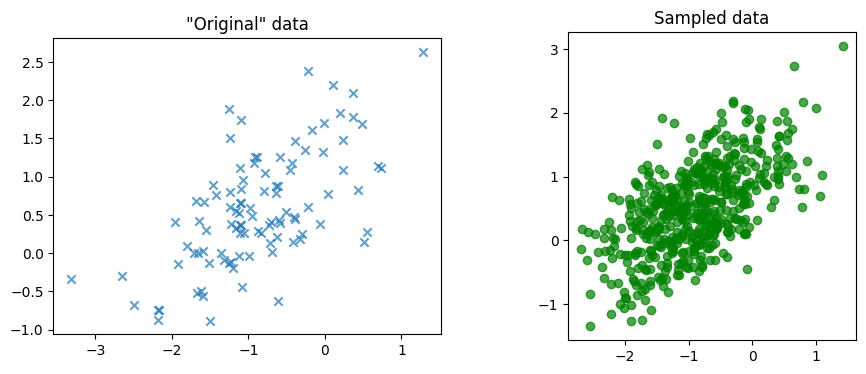

In [29]:
fig = plt.figure(5, figsize=(11, 4))
ax = plt.subplot(121)
ax.scatter(rot_sample[0, :], rot_sample[1, :], marker="x", alpha=0.7)
ax.set_title('"Original" data')
ax.set_aspect("equal")
ax = plt.subplot(122)
ax.scatter(e_x, e_y, marker="o", color="g", alpha=0.7)
ax.set_title("Sampled data")
ax.set_aspect("equal")

In [ ]:
x, y = np.mgrid[-4:4:0.01, -3:3:0.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv = multivariate_normal(estimated_mean, estimated_cov)

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    x,
    y,
    rv.pdf(pos),
    cmap=cm.viridis_r,
    rstride=30,
    cstride=10,
    linewidth=0,
    alpha=0.47,
)
ax.plot_wireframe(x, y, rv.pdf(pos), linewidth=0.47, alpha=0.47, color="k")
ax.scatter(e_x, e_y, 0.4, marker=".", alpha=0.47)
ax.axis("tight");